In [1]:
%run "..\Startup_py3.py"
sys.path.append(r"..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

17560


In [6]:
import ImageAnalysis3.segmentation_tools.cell

creating new log file
2022-02-23 22:11:42,035 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log


<module 'ImageAnalysis3.segmentation_tools.cell' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\segmentation_tools\\cell.py'>

In [56]:
reload(ia.segmentation_tools.cell)

rna_feature_fl = r'I:\MERFISH_Analysis\Cellpose\20220208-P_brain_M1_nonclear\CellPoseSegment\features\feature_data_1.hdf5'

rna_dapi_fl = r'\\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear\Segmentation_Cellpose\Conv_zscan_001_Dapi.npy'
microscope_fl = r'E:\Users\puzheng\Documents\Merfish_analysis\Merfish_Analysis_Scripts\merlin_parameters\microscope\storm6_microscope.json'
rotation = np.load(r'\\mendel\Mendel_SSD1\Pu_Temp\20220215-P_brain_CTP11-1000_CTP12_from0208\rotation.npy')
dna_save_fl = r'F:\Pu_Temp\20220215-P_brain_CTP11-1000_CTP12_from0208\Conv_zscan_001.hdf5'
_align_seg = segmentation_tools.cell.Align_Segmentation(rna_feature_fl, rna_dapi_fl, 
                                                        dna_save_fl, microscope_fl, rotation)

In [58]:
%%time
dna_mask = _align_seg._generate_dna_mask()

- reconstruct 50 layers
-- start calculating drift with rotation between images
-- start aligning given source image to given reference image.
-- aligned image 0 in 4.256s.
-- aligned image 1 in 4.098s.
-- aligned image 2 in 4.240s.
-- aligned image 3 in 4.300s.
-- aligned image 4 in 3.881s.
-- aligned image 5 in 4.230s.
-- aligned image 6 in 4.179s.
-- aligned image 7 in 4.867s.
-- return a sub-optimal drift
--- drift: [ -0.33  -4.1  -59.7 ] pixels
- generate rotation matrix
- rotate segmentation label with rotation matrix
Wall time: 1min 40s


In [60]:
with h5py.File(dna_save_fl, 'r') as _f:
    print(_f.attrs['fov_id'])

1


In [39]:
_mparam = _align_seg._read_microscope_json(_align_seg.microscope_file)
rna_mask, _z_coords, _fovcell_2_uid = _align_seg._load_rna_feature(_align_seg.rna_feature_file, _mparam)

In [40]:
dapi_im, fov_name = _align_seg._load_dna_info(_align_seg.dna_save_file)

In [59]:
visual_tools.imshow_mark_3d_v2([rna_mask, dapi_im, dna_mask])

<IPython.core.display.Javascript object>

In [2]:
data_folder = r'\\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear'
folders, fovs = ia.io_tools.data.get_folders(data_folder)
ref_id = 0
ref_folder = folders[ref_id]
print(ref_folder)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 11
- Number of field of views: 163
\\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear\H0M1


In [3]:
correction_folder = r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210621-Corrections_lumencor_from_60_to_50'

segmentation_folder = os.path.join(data_folder, 'Segmentation')
if not os.path.exists(segmentation_folder):
    print(f"Create segmentation_folder: {segmentation_folder}")
    os.makedirs(segmentation_folder)
else:
    print(f"Use segmentation_folder: {segmentation_folder}")

segmentation_figure_folder = os.path.join(segmentation_folder, 'Figures')
if not os.path.exists(segmentation_figure_folder):
    print(f"Create segmentation_figure_folder: {segmentation_figure_folder}")
    os.makedirs(segmentation_figure_folder)
else:
    print(f"Use segmentation_figure_folder: {segmentation_figure_folder}")
from ImageAnalysis3.figure_tools import plot_segmentation    
    
from ImageAnalysis3.segmentation_tools import cell  
pixel_sizes = [250,108,108]
single_im_size = [50,2048,2048]


Use segmentation_folder: \\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear\Segmentation
Use segmentation_figure_folder: \\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear\Segmentation\Figures
creating new log file
2022-02-21 23:21:15,430 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log


In [4]:
# Load image
for _fov in fovs:
    image_filename = os.path.join(ref_folder, _fov)

    segmentation_filename = os.path.join(segmentation_folder, 
                                         _fov.replace('.dax', '_Segmentation.npy') )
    dapi_filename = os.path.join(segmentation_folder, 
                                 os.path.basename(_fov).replace('.dax', '_Dapi.npy') )

    if os.path.exists(dapi_filename):
        _dapi_im = np.load(dapi_filename)
    else:
        # load image
        _polyt_im, _dapi_im = ia.io_tools.load.correct_fov_image(
            image_filename, [488,405],
            single_im_size=[50,2048,2048],
            num_empty_frames=0, num_buffer_frames=0,
            all_channels=[750,647,561,488,405],
            calculate_drift=False, 
            correction_folder=correction_folder,
            illumination_corr=True, hot_pixel_corr=True,
        )[0]
    break

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear\H0M1\Conv_zscan_000.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_0\20220208-P_brain_M1_nonclear\H0M1\Conv_zscan_000.dax  in 4.366s
-- removing hot pixels for channels:['488', '405'] in 20.867s
-- illumination correction for channels: 488, 405, in 6.574s
-- warp image with chromatic correction for channels: [] and drift:[0. 0. 0.] in 0.000s
-- finish correction in 34.631s


In [25]:
sys.path.append(r"E:\Users\puzheng\Documents\Merfish_analysis\MERlin")
import merlin
#from analysis import segment
from merlin.analysis.segment import CellPoseSegment

In [26]:
reload(merlin.analysis.segment)

<module 'merlin.analysis.segment' from 'E:\\Users\\puzheng\\Documents\\Merfish_analysis\\MERlin\\merlin\\analysis\\segment.py'>

<function merlin.analysis.segment.CellPoseSegment.combine_2d_segmentation_masks_into_3d(segmentationOutput: numpy.ndarray, minKept_zLen: int = 2) -> numpy.ndarray>

In [28]:
from cellpose import models

In [29]:
%%time
_nucl_model = models.Cellpose(gpu=True, model_type='nuclei', )

2022-02-21 23:37:34,036 [INFO] ** TORCH CUDA version installed and working. **
2022-02-21 23:37:34,037 [INFO] >>>> using GPU
Wall time: 14.5 s


In [42]:
%%time
from scipy.ndimage.filters import minimum_filter, gaussian_filter, maximum_filter
_sel_dapi_im = gaussian_filter(_dapi_im[::4], 2)

Wall time: 2.3 s


In [46]:
?_nucl_model.eval

In [47]:
%%time
_full_nucl = _nucl_model.eval(np.stack([_sel_dapi_im,_sel_dapi_im], axis=3),
                       channels=[1,0], diameter=50, min_size=200, 
                       flow_threshold=0.4, stitch_threshold=0.1,
                       )

2022-02-21 23:53:57,292 [INFO] ~~~ FINDING MASKS ~~~
2022-02-21 23:53:57,293 [INFO] multi-stack tiff read in as having 13 planes 2 channels
::> (13, 2048, 2048, 2)
2022-02-21 23:54:13,047 [INFO] 100%|##########| 13/13 [00:14<00:00,  1.13s/it]
2022-02-21 23:54:13,047 [INFO] network run in 14.69s


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\nn\functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


:> 13
2022-02-21 23:54:21,535 [INFO] stitching 13 masks using stitch_threshold=0.100 to make 3D masks
2022-02-21 23:54:22,117 [INFO] masks created in 9.07s
2022-02-21 23:54:23,359 [INFO] >>>> TOTAL TIME 26.07 sec
Wall time: 26.3 s


In [48]:
%%time
_full_mask = CellPoseSegment.combine_2d_segmentation_masks_into_3d(
    _full_nucl[0], 
    minKept_zLen=np.round(_full_nucl[0].shape[0]/10),
    )

Wall time: 1min 1s


<IPython.core.display.Javascript object>


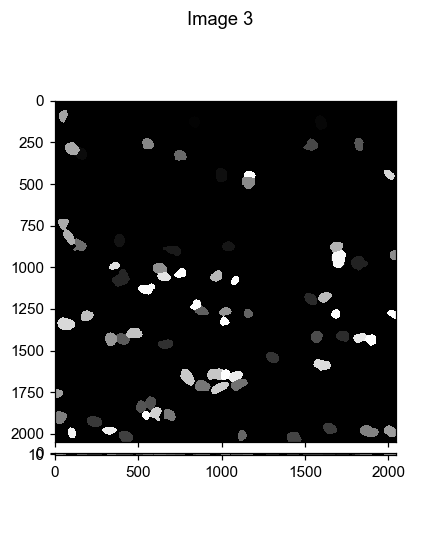

In [49]:
visual_tools.imshow_mark_3d_v2([_sel_dapi_im, _full_nucl[0], _full_mask])


In [50]:
# watershed

In [51]:
from merlin.util.watershed import prepare_watershed_images

In [68]:
%%time
normalizedWatershed, watershedMask = prepare_watershed_images(maximum_filter(_polyt_im[::4], 4), 1.4)

Wall time: 27.1 s


<IPython.core.display.Javascript object>


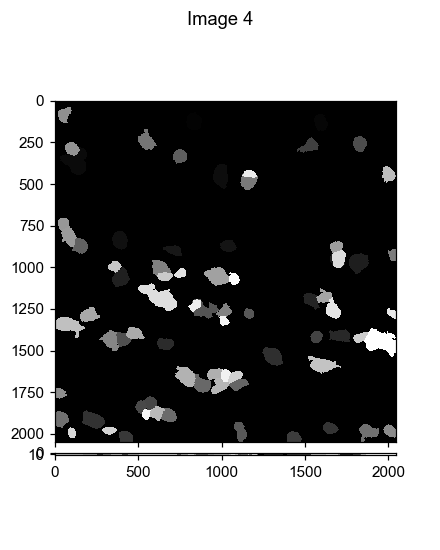

In [72]:
visual_tools.imshow_mark_3d_v2([normalizedWatershed, watershedMask, _full_mask, watershedOutput])


In [70]:
watershedMask[_full_mask > 0] = True

In [71]:
%%time
from skimage import segmentation

watershedOutput = segmentation.watershed(
    normalizedWatershed, _full_mask, mask=watershedMask,
    connectivity=np.ones((3, 3, 3)), watershed_line=True)

Wall time: 37.2 s


In [73]:
import h5py

In [116]:
with h5py.File(r'I:\MERFISH_Analysis\Cellpose\20220208-P_brain_M1_nonclear\CellPoseSegment\features\feature_data_133.hdf5', 'r') as _f:
    print(_f.keys())
    _label_grp = _f['labeldata']
    _labels = _label_grp['label3D'][:]
    _grp = _f['featuredata']
    print(_grp.keys())
    _cell = _grp['101819006959141075497500495757617455246']
    
    print(_cell.attrs['label'], _cell.attrs['fov'])

<KeysViewHDF5 ['featuredata', 'labeldata']>
<KeysViewHDF5 ['101819006959141075497500495757617455246', '104205047084023038745477341184713663342', '105006104993920031031282307645572284800', '107819768705346483857583322143838355692', '113021166959480764144542185380027352008', '1137178557092891953042965451579140504', '115360784875212432580346620794547784575', '120977080658194364159144241739986133407', '121562617433599593911638363200894737706', '124032330113452873440097716012007990412', '126824456327393735199768368388058305728', '129978705646864741141893607335138259657', '130390428003446447423755576217320151992', '130470564962241189178969880124950182531', '13170695379960806503889474058987172388', '132393229519573384721559404141372419993', '139342310050384889913837331918230565603', '143316394530745317584721207631278101930', '144529577681899845245155189611250117092', '144836668696814889682336549026415397091', '145638519044409334087607351126452637542', '146101883533734075990693806428297931209'

In [110]:
visual_tools.imshow_mark_3d_v2([_labels])


<IPython.core.display.Javascript object>